In [71]:
import tensorflow as tf 
import cv2
import numpy as np 
from matplotlib import pyplot as plt 

from tensorflow.keras.layers import Input, Conv2D, Dropout, Activation, MaxPooling2D, Flatten, Dense, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

In [72]:
fldr = "/kaggle/input/utkface-new/UTKFace"

In [73]:
import os
files = os.listdir(fldr)
print(files)

['26_0_2_20170104023102422.jpg.chip.jpg', '22_1_1_20170112233644761.jpg.chip.jpg', '21_1_3_20170105003215901.jpg.chip.jpg', '28_0_0_20170117180555824.jpg.chip.jpg', '17_1_4_20170103222931966.jpg.chip.jpg', '44_0_3_20170119201022260.jpg.chip.jpg', '35_0_2_20170116182734834.jpg.chip.jpg', '76_0_0_20170104213515132.jpg.chip.jpg', '36_1_0_20170116165722892.jpg.chip.jpg', '34_0_3_20170119200815948.jpg.chip.jpg', '18_1_0_20170104022856102.jpg.chip.jpg', '40_1_1_20170113011948248.jpg.chip.jpg', '45_0_0_20170117180013541.jpg.chip.jpg', '26_1_1_20170117153641469.jpg.chip.jpg', '70_1_0_20170120222024102.jpg.chip.jpg', '26_1_0_20170117174144110.jpg.chip.jpg', '67_0_2_20170112224629884.jpg.chip.jpg', '12_1_0_20170109203700059.jpg.chip.jpg', '24_1_2_20170116173442433.jpg.chip.jpg', '54_0_3_20170117155453576.jpg.chip.jpg', '45_0_3_20170119204212534.jpg.chip.jpg', '24_1_0_20170119171026777.jpg.chip.jpg', '4_0_0_20170110212940437.jpg.chip.jpg', '46_0_3_20170119204836094.jpg.chip.jpg', '38_0_0_20170116

In [74]:
ages = []
genders = []
images = []

for fle in files:
    age = int(fle.split('_')[0])
    gender = int(fle.split('_')[1])
    total = fldr+'/'+fle
    print(total)
    image = cv2.imread(total)

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (48,48))
    images.append(image)

/kaggle/input/utkface-new/UTKFace/26_0_2_20170104023102422.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/22_1_1_20170112233644761.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/21_1_3_20170105003215901.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/28_0_0_20170117180555824.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/17_1_4_20170103222931966.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/44_0_3_20170119201022260.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/35_0_2_20170116182734834.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/76_0_0_20170104213515132.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/36_1_0_20170116165722892.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/34_0_3_20170119200815948.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/18_1_0_20170104022856102.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/40_1_1_20170113011948248.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/45_0_0_20170117180013541.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/26_1_1_20170117153641469.jpg.c

In [75]:
for fle in files:
    age = int(fle.split('_')[0])
    gender = int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)

22
1


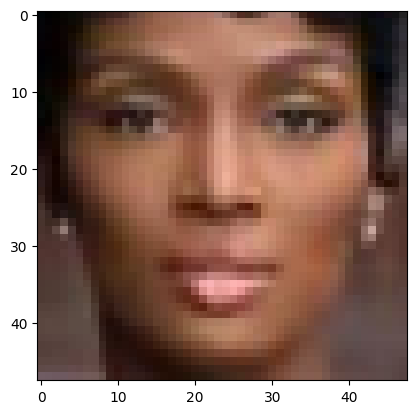

In [76]:
plt.imshow(images[1])
print(ages[1])
print(genders[1])

In [77]:
images_f = np.array(images)
ages_f = np.array(ages)
genders_f = np.array(genders)

np.save('/kaggle/working/image.npy',images_f)
np.save('/kaggle/working/ages.npy',ages_f)
np.save('/kaggle/working/genders.npy',genders_f)

[12391 11317]


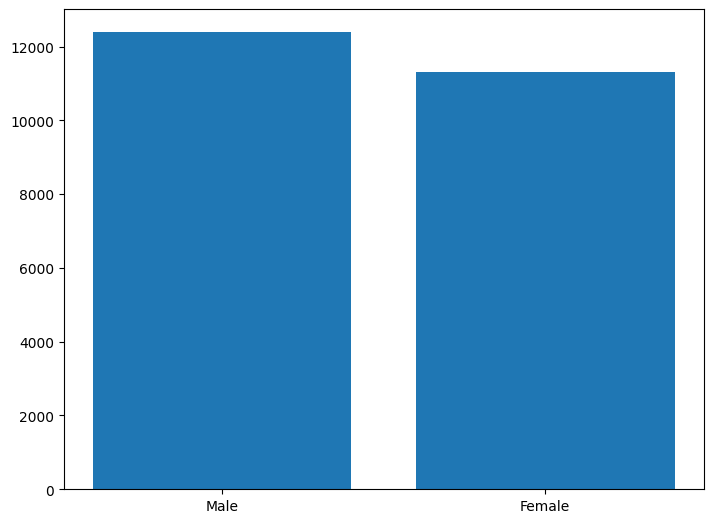

In [78]:
values, counts = np.unique(genders_f, return_counts= True)
print(counts)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male','Female']
values =  [12391,11317]
ax.bar(gender,values)
plt.show()

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


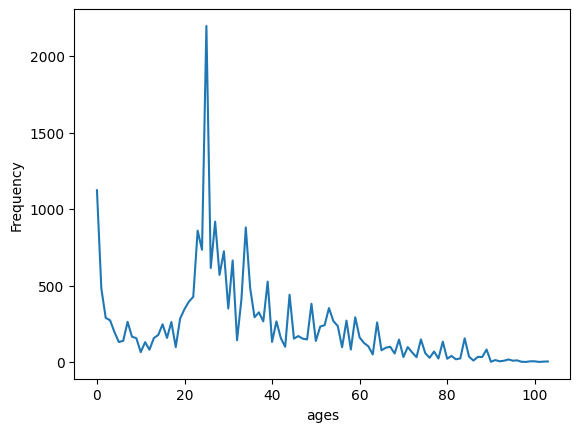

In [79]:
values, counts = np.unique(ages_f, return_counts = True)
print(counts)

# converting Age counts to lists
val = values.tolist()
cnt = counts.tolist()

plt.plot(counts)
plt.xlabel('ages')
plt.ylabel('Frequency')
plt.show()

In [80]:
labels = []
i = 0
while i < len(ages):
    label = []
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i = i+1

In [81]:
images_f_2 = images_f/255
print(images_f_2.shape)
labels_f = np.array(labels)
print(labels_f.shape)

(23708, 48, 48, 3)
(23708, 2)


In [82]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images_f_2,labels_f,test_size=0.25)
print(y_train[0:5])

y_train_2 = [y_train[:,1],y_train[:,0]]
y_test_2 = [y_test[:,1],y_test[:,0]]

print(y_train_2)

[[26  1]
 [55  0]
 [25  1]
 [28  0]
 [46  1]]
[array([1, 0, 1, ..., 0, 1, 1]), array([26, 55, 25, ..., 80, 27,  1])]


In [83]:
"""def Convolution(input_tensor,filters):
    x = Conv2D(filters=filters, kernel_size = (3,3), padding = 'same', strides = (1,1), kernel_regularizer = l2(0.001))(input_tensor)
    x =Dropout(0.1)(x)
    x = Activation('relu')(x)
    return x"""

def Convolution(input_tensor, filters):
    x = Conv2D(filters=filters, kernel_size=(3, 3), padding='same', strides=(1, 1), kernel_regularizer=l2(0.001))(input_tensor)
    x = Dropout(0.1)(x)
    x = Activation('relu')(x)
    return x

In [84]:
def model(input_shape):
    inputs = Input((input_shape))
    conv_1 = Convolution(inputs, 32)
    maxp_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)
    conv_2 = Convolution(maxp_1, 64)
    maxp_2 = MaxPooling2D(pool_size=(2, 2))(conv_2)
    conv_3 = Convolution(maxp_2, 128)
    maxp_3 = MaxPooling2D(pool_size=(2, 2))(conv_3)
    conv_4 = Convolution(maxp_3, 256)
    maxp_4 = MaxPooling2D(pool_size=(2, 2))(conv_4)
    flatten = Flatten()(maxp_4)
    dense_1 = Dense(64, activation='relu')(flatten)
    dense_2 = Dense(64, activation='relu')(flatten)
    drop_1 = Dropout(0.2)(dense_1)
    drop_2 = Dropout(0.2)(dense_2)
    output_1 = Dense(1, activation='sigmoid', name='gender_out')(drop_1)
    output_2 = Dense(1, activation='relu', name='age_out')(drop_2)
    model = Model(inputs=inputs, outputs=[output_1, output_2])
    model.compile(loss=['binary_crossentropy', 'mae'], optimizer='Adam', metrics=['accuracy'])
    return model

In [85]:
Model = model((48, 48, 3))

In [86]:
Model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv2d_12 (Conv2D)          (None, 48, 48, 32)           896       ['input_4[0][0]']             
                                                                                                  
 dropout_18 (Dropout)        (None, 48, 48, 32)           0         ['conv2d_12[0][0]']           
                                                                                                  
 activation_12 (Activation)  (None, 48, 48, 32)           0         ['dropout_18[0][0]']          
                                                                                            

In [87]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [88]:
fle_s = 'Age_gender_detector.h5'
checkpoint = ModelCheckpoint(fle_s, monitor ='val_loss', verbose =1, save_best_only = True, save_weights_only = False, mode = "auto" ,save_freq = 'epoch')
Early_stop = tf.keras.callbacks.EarlyStopping(patience =75, monitor='val_loss', restore_best_weights='True')
callback_list = [checkpoint, Early_stop]

In [89]:
History = Model.fit(x_train, y_train_2, batch_size=32, validation_data =(x_test, y_test_2), epochs=300, callbacks = callback_list)

Epoch 1/300


2024-01-09 17:18:22.313260: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_1/dropout_18/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


554/556 [============================>.] - ETA: 0s - loss: 7.7330 - gender_out_loss: 0.3029 - age_out_loss: 6.9061 - gender_out_accuracy: 0.8686 - age_out_accuracy: 0.0472
Epoch 12: val_loss improved from 7.91416 to 7.90276, saving model to Age_gender_detector.h5
556/556 [==============================] - 5s 9ms/step - loss: 7.7313 - gender_out_loss: 0.3032 - age_out_loss: 6.9040 - gender_out_accuracy: 0.8686 - age_out_accuracy: 0.0471 - val_loss: 7.9028 - val_gender_out_loss: 0.2787 - val_age_out_loss: 7.0869 - val_gender_out_accuracy: 0.8718 - val_age_out_accuracy: 0.0481
Epoch 13/300
554/556 [============================>.] - ETA: 0s - loss: 7.6325 - gender_out_loss: 0.3009 - age_out_loss: 6.7838 - gender_out_accuracy: 0.8652 - age_out_accuracy: 0.0471
Epoch 13: val_loss did not improve from 7.90276
556/556 [==============================] - 5s 9ms/step - loss: 7.6292 - gender_out_loss: 0.3010 - age_out_loss: 6.7803 - gender_out_accuracy: 0.8651 - age_out_accuracy: 0.0471 - val_loss

In [90]:
Model.evaluate(x_test, y_test_2)

186/186 [==============================] - 1s 3ms/step - loss: 7.4511 - gender_out_loss: 0.2956 - age_out_loss: 6.5589 - gender_out_accuracy: 0.8618 - age_out_accuracy: 0.0481


[7.451054096221924,
 0.29557138681411743,
 6.558888912200928,
 0.861818790435791,
 0.048085033893585205]

In [91]:
pred = Model.predict(x_test)
pred[1]

186/186 [==============================] - 1s 2ms/step


array([[46.54258 ],
       [34.7564  ],
       [32.907528],
       ...,
       [33.224056],
       [32.103836],
       [59.94837 ]], dtype=float32)

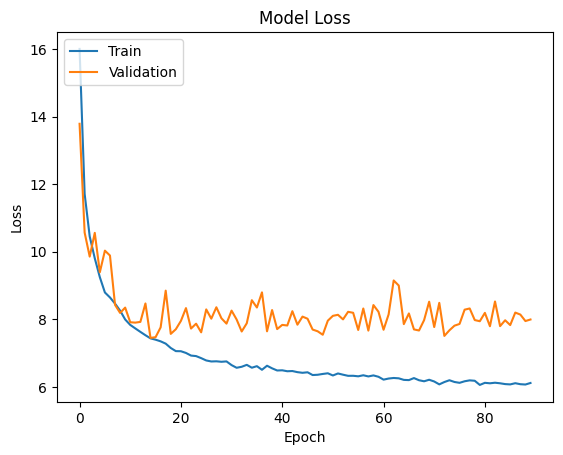

In [92]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

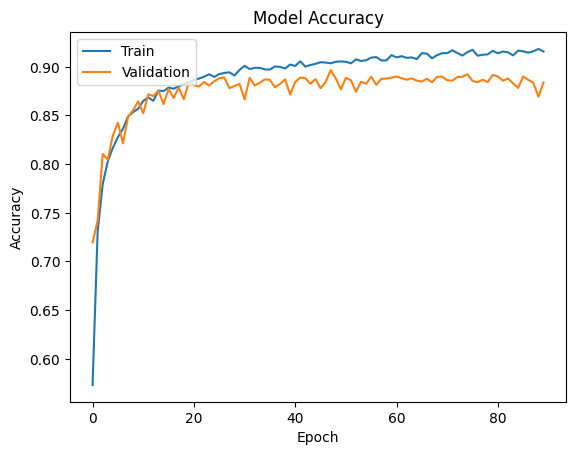

In [93]:
plt.plot(History.history['gender_out_accuracy'])
plt.plot(History.history["val_gender_out_accuracy"])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

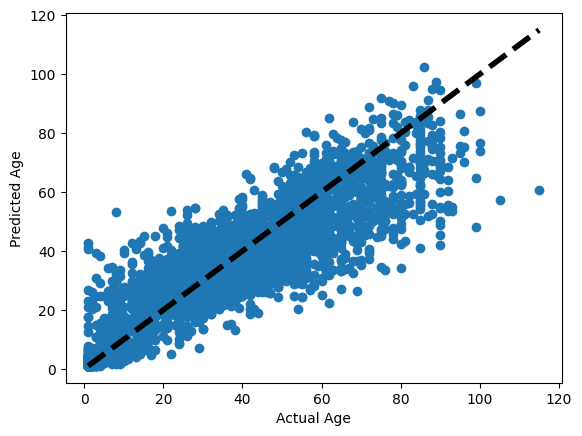

In [94]:
fig, ax = plt.subplots()
ax.scatter(y_test_2[1], pred[1])
ax.plot([y_test_2[1].min(), y_test_2[1].max()], [y_test_2[1].min(), y_test_2[1].max()], 'k--', lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

In [95]:
i = 0
Pred_l = []
while i < len(pred[0]):
    Pred_l.append(int(np.round(pred[0][i])))
    i += 1

In [96]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      3122
           1       0.89      0.81      0.85      2805

    accuracy                           0.86      5927
   macro avg       0.86      0.86      0.86      5927
weighted avg       0.86      0.86      0.86      5927



<Axes: >

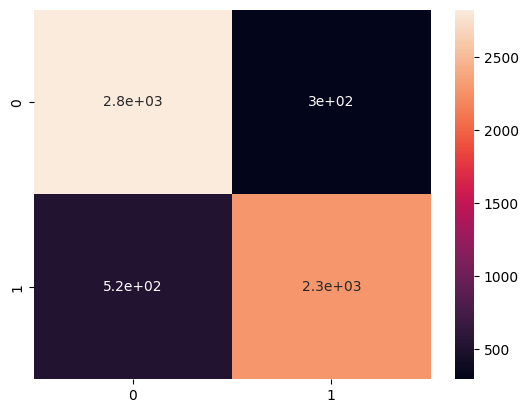

In [97]:
report = classification_report(y_test_2[0], Pred_l)
print(report)

results = confusion_matrix(y_test_2[0], Pred_l)
import seaborn as sns
sns.heatmap(results, annot=True)

1/1 [==============================] - 0s 21ms/step
Predicted Age is 24
Predicted Gender is Male


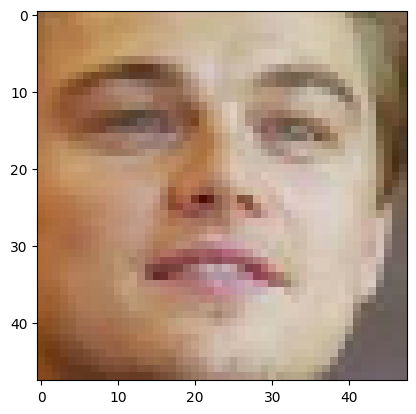

In [98]:
def test_image(ind, images_f, images_f_2, model):
    plt.imshow(images_f[ind])
    image_test = images_f_2[ind]
    pred_l = model.predict(np.array([image_test]))
    gender_f = ['Male', 'Female']
    age = int(np.round(pred_l[1][0]))
    gender = int(np.round(pred_l[0][0]))
    print('Predicted Age is ' + str(age))
    print('Predicted Gender is ' + gender_f[gender])

# Example usage:
test_image(3, images_f, images_f_2, Model)

1/1 [==============================] - 0s 20ms/step
Predicted Age is 29
Predicted Gender is Female


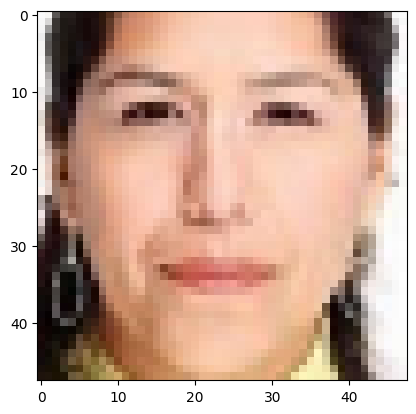

In [99]:
test_image(60, images_f, images_f_2, Model)

1/1 [==============================] - 0s 21ms/step
Predicted Age is 2
Predicted Gender is Female


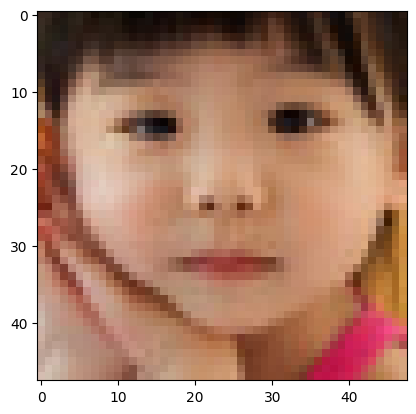

In [100]:
test_image(100, images_f, images_f_2, Model)